# Curve Fitting - Polynomials

In [1]:
import numpy as np
from numpy import polyfit
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as so
import numpy.linalg as npla

Here a function is defined to fit a polynomial in some given data.

For a fitting polynomial, 
$$y = a_0 +a_1 x +a_2 x^2 +... +a_n x^n = \sum_{i=0}^n a_i x^i$$
The fitting parameters can be calculated by the matrix relation (for $n=3$);
$$
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\end{bmatrix}
=
\begin{bmatrix}
n & \sum x & \sum x^2 \\
\sum x & \sum x^2 & \sum x^3 \\
\sum x^2 & \sum x^3 & \sum x^4 \\
\end{bmatrix} ^{-1}
\begin{bmatrix}
\sum y \\
\sum xy \\
\sum x^2y \\
\end{bmatrix} $$

This idea can be extended for higher degree polynomials. We can do this by available functions, `polyfit` (in `numpy`) and `curve_fit` (in `scipy.optimize`) also.

In [2]:
def fitfn3(x_data, y_data):
    n = x_data.size
    sum_x, sum_x2 = np.sum(x_data), np.sum(x_data**2)
    sum_x3, sum_x4 = np.sum(x_data**3), np.sum(x_data**4)
    sum_y,sum_xy,sum_x2y = np.sum(y_data),np.sum(x_data*y_data),np.sum(x_data**2*y_data)
    mat1 = np.array([[n,sum_x,sum_x2],[sum_x,sum_x2,sum_x3],[sum_x2,sum_x3,sum_x4]])
    mat2 = np.array([[sum_y],[sum_xy],[sum_x2y]])
    p = npla.inv(mat1) @ mat2
    yfn = lambda x: p[0] +p[1]*x +p[2]*x**2
    return p, yfn

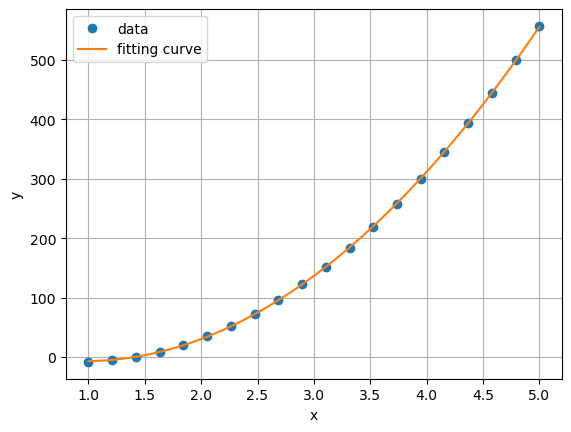

array([[ 24.53434903],
       [-66.17811634],
       [ 34.5       ]])

In [3]:
xdata = np.linspace(1,5,20)
# ydata = 3*np.exp(-0.5*(xdata-2)**2)
ydata = 0.5*xdata**3 + 30*xdata**2 -54*xdata +15

p, yfn = fitfn3(xdata, ydata)
x1 = np.linspace(xdata.min(),xdata.max(),100)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x1, yfn(x1), label='fitting curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
display(p)

## Fitting for $n^{th}$ degree polynomial

In [4]:
import numpy.linalg as npla
def polyfitn(n, x_data, y_data):
    '''Fitting of nth degree polynomial
    function used: polyfitn(n, x_data, y_data)
    n: degree of polynomial
    x_data: x array of data
    y_data: y array of data
    return: p (fitting parameters in form of an array), 
                yfn (fitting function as a lambda function yfn(x))'''
    x1, y1 = x_data, y_data
    mat1 = [[np.sum(x_data**(i+j)) for i in range(n)] for j in range(n)]
    mat2 = [np.sum(x_data**i*y_data) for i in range(n)]
    mat1, mat2 = np.array(mat1), np.array(mat2)
    p = npla.inv(mat1) @ mat2
    yfn = lambda x: sum([p[i]*x**i for i in range(n)])  # don't use np.sum
    return p, yfn

In [5]:
print(polyfitn.__doc__)

Fitting of nth degree polynomial
    function used: polyfitn(n, x_data, y_data)
    n: degree of polynomial
    x_data: x array of data
    y_data: y array of data
    return: p (fitting parameters in form of an array), 
                yfn (fitting function as a lambda function yfn(x))


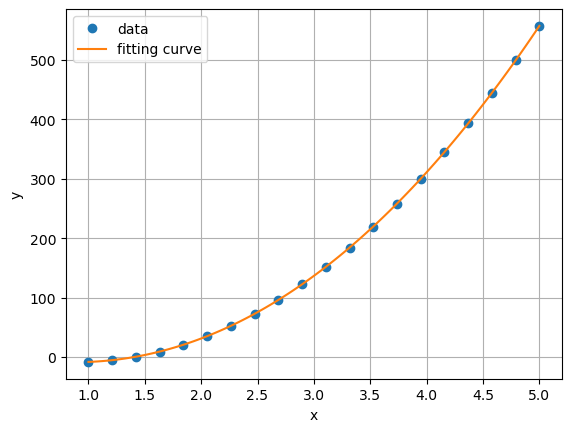

array([ 1.50000000e+01, -5.40000000e+01,  3.00000000e+01,  5.00000001e-01,
       -5.82076609e-11])

In [6]:
p, yfn = polyfitn(5, xdata, ydata)
x1 = np.linspace(xdata.min(),xdata.max(),100)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x1, yfn(x1), label='fitting curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
display(p)

## Comparison of plots for fitting different degree of polynomials

n=3: fitting parameters, p=[-1.14486318  1.42362376 -0.0972345 ]
n=4: fitting parameters, p=[ 0.1891685  -0.41699118  0.37490808 -0.03147617]
n=6: fitting parameters, p=[ 0.05208431  0.41224242 -0.33887402  0.17969956 -0.02523904  0.00104769]


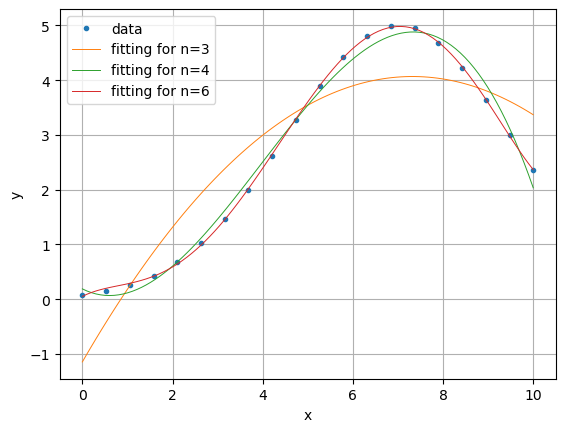

In [7]:
xdata = np.linspace(0, 10, 20)
ydata = 5*np.exp(-(xdata-7)**2/12)
x1 = np.linspace(xdata.min(), xdata.max(), 100)
plt.plot(xdata, ydata, 'o', ms=3, label='data')

for ni in [3,4,6]:
    p, yf = polyfitn(ni, xdata, ydata)
    print(f'n={ni}: fitting parameters, p={p}')
    plt.plot(x1, yf(x1), lw=0.7, label=f'fitting for n={ni}')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Using avialable `polyfit` function

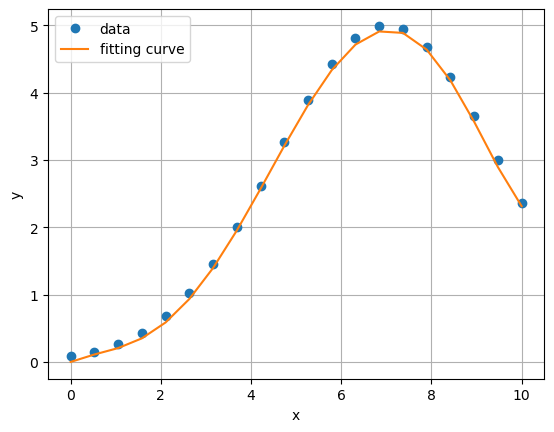

In [8]:
pfit = polyfit(xdata, ydata, 6)
dg = pfit.size-1
y_fn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg)])
y_fit = y_fn(xdata)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, y_fit, label='fitting curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()